I want to start comparing the subsets in transcriptomic data and compare that to ephys groups that are present in the Ndnf cells

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from allensdk.core.nwb_data_set import NwbDataSet
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor 
#import allensdk_lims.internal.core.lims_utilities as lu
import pg8000
import os


In [2]:
#load excel version of patchseq log

df = pd.read_excel('Patch-seq log.xlsx', 'Mouse PatchSeq')
df.head()

,"""",Date,User,Rig #,File,Ephys,Trans,Morph,Pilot,Pilot Details,...,distance to edge,Plate,20x status,20x LIMS link,63x go no go,63x QC,Confidence,Bad dates,Notes.1,Unnamed: 78
0,NaN,170104,P1,5,Gad2-IRES-Cre;Ai14-292660.07.01.01,?,x,n,2nd Pipette,aCSF III with 1.0 U RNase Inhibitor,...,236,79,qc,http://lims2/focal_plane_image_series?id=56435...,NaN,NaN,NaN,x,"did not aliquot internal, shared",NaN
1,NaN,170104,P1,5,Gad2-IRES-Cre;Ai14-292660.07.01.02,x,x,n,2nd Pipette,aCSF III with 1.0 U RNase Inhibitor,...,99,79,qc,http://lims2/focal_plane_image_series?id=56435...,NaN,NaN,NaN,x,NaN,NaN
2,NaN,170104,P1,5,Gad2-IRES-Cre;Ai14-292660.07.01.03,?,x,n,2nd Pipette,aCSF III with 1.0 U RNase Inhibitor,...,150,79,qc,http://lims2/focal_plane_image_series?id=56435...,NaN,NaN,NaN,x,NaN,NaN
3,NaN,170104,P1,5,Gad2-IRES-Cre;Ai14-292660.08.01.01,?,x,n,2nd Pipette,aCSF III with 1.0 U RNase Inhibitor,...,84,76,qc,http://lims2/focal_plane_image_series?id=56435...,NaN,NaN,NaN,x,NaN,NaN
4,NaN,170104,P1,5,Gad2-IRES-Cre;Ai14-292660.08.01.02,x,x,y,2nd Pipette,aCSF III with 1.0 U RNase Inhibitor,...,44,76,qc,http://lims2/focal_plane_image_series?id=56435...,63x go,image_qc_passed,NaN,x,NaN,NaN


In [6]:
df['cell type'].unique()

array([u'tdt+', nan, u'tdt-', u'pyr', u'exc', u'?', u'GFP+', u'cre-',
       u'Cre+', u'None'], dtype=object)

In [5]:
#remove cre- cells
df = df[(df['cell type'] == 'tdt+') | (df['cell type'] == 'Cre+') | (df['cell type'] == 'GFP+')]

#Sort out the Ndnf cells
#this only looks for Ndnf cells by LIMS names right now

#this won't work if LIMS ID is a number so make all of them a string
df['Cre line'] = df['Slice (Lims ID?)'].map(lambda x: 'Ndnf' if "Ndnf" in str(x) else x)

df = df[df['Cre line'] =='Ndnf']

#drop all of the cells that can't be clustered
df = df.dropna(subset = ['Cluster'])

In [6]:
df.head()

,"""",Date,User,Rig #,File,Ephys,Trans,Morph,Pilot,Pilot Details,...,Plate,20x status,20x LIMS link,63x go no go,63x QC,Confidence,Bad dates,Notes.1,Unnamed: 78,Cre line
816,NaN,170301,P2,5,Ndnf-IRES2-dgCre;Ai14-303175.03.01.01,x,x,n,Tolias protocol,NaN,...,NaN,qc,http://lims2/focal_plane_image_series?id=57431...,NaN,NaN,NaN,NaN,NaN,NaN,Ndnf
817,NaN,170301,P2,5,Ndnf-IRES2-dgCre;Ai14-303175.03.01.02,x,x,n,Tolias protocol,NaN,...,NaN,qc,http://lims2/focal_plane_image_series?id=57431...,NaN,NaN,NaN,NaN,NaN,NaN,Ndnf
818,NaN,170301,P2,5,Ndnf-IRES2-dgCre;Ai14-303175.03.01.03,x,x,n,Tolias protocol,NaN,...,NaN,qc,http://lims2/focal_plane_image_series?id=57431...,NaN,NaN,NaN,NaN,NaN,NaN,Ndnf
821,NaN,170302,P1,6,Ndnf-IRES2-dgCre;Ai14-303177.03.01.01,x,x,n,Tolias protocol,NaN,...,NaN,qc,http://lims2/focal_plane_image_series?id=57431...,NaN,NaN,NaN,NaN,NaN,NaN,Ndnf
822,NaN,170302,P1,6,Ndnf-IRES2-dgCre;Ai14-303177.03.01.02,x,x,n,Tolias protocol,NaN,...,NaN,qc,http://lims2/focal_plane_image_series?id=57431...,NaN,NaN,NaN,NaN,NaN,NaN,Ndnf


In [9]:
#look at what we have
df['Cluster'].value_counts()

n14              16
n6               12
n3               11
n5                9
n13               9
n4                6
Lamp5 Nxph1_3     5
Lamp5 Nxph1_1     2
Lamp5 Rgs12_3     2
n52               2
n10               2
n87               1
n36               1
L6a Syt17_4       1
Sst Chodl         1
Name: Cluster, dtype: int64

In [7]:
def get_nwb(specimen):
    #SQL query to pull the nwb path name from LIMS. Also calls separate function
    #to change path name from Linux to Windows
    conn = pg8000.connect(user="limsreader", host="limsdb2", database="lims2", password="limsro", port=5432)
    cur = conn.cursor()
    
    cur.execute("SELECT s.name, s.ephys_roi_result_id, s.id FROM specimens s WHERE s.name LIKE %s", ('%' + specimen,))
    result = cur.fetchone()
    if result is None:
        print "Could not find specimen result for " + specimen + ". Skipping..."
        return None
    specimen_name = result[0]
    ephys_roi_result_id = result[1]


    cur.execute("SELECT f.filename, f.storage_directory FROM well_known_files f \
                 WHERE f.attachable_type = 'EphysRoiResult' AND f.attachable_id = %s AND f.filename LIKE '%%.nwb'", 
                 (ephys_roi_result_id,))
    result = cur.fetchone()
    if result is None:
        print "Could not find json file for " + specimen + ". Skipping..."
        return None
    WinP = LinuxtoWindow(result[1])
    json_path = WinP + result[0]

    return json_path
    conn.close()
    
def LinuxtoWindow(Linuxpath):
    #sorts out the paths listed in LIMS
    
    SplitLinux = Linuxpath.split('/')
    if 'allen' in Linuxpath:
        return (r"\\" + os.path.join(SplitLinux[0], SplitLinux[1],SplitLinux[2], 'celltypes',SplitLinux[4],SplitLinux[5],SplitLinux[6],SplitLinux[7],''))
    else:
        return (r"\\" + os.path.join(SplitLinux[0],'allen','programs','celltypes', 'production',
                                     SplitLinux[2], SplitLinux[4],SplitLinux[5],''))

In [8]:
get_nwb(cell)

NameError: name 'cell' is not defined

In [9]:
data = NwbDataSet(get_nwb(df['File'].iloc[40]))
#nwb_path = '\\\\allen\programs\\celltypes\\production\\mousecelltypes\\prod170\\Ephys_Roi_Result_623440512\\623440512.nwb'
#data = NwbDataSet(nwb_path)
get_nwb(df['File'].iloc[0])

u'\\\\allen\\programs\\celltypes\\production\\mousecelltypes\\prod90\\Ephys_Roi_Result_571715912\\571715912.nwb'

In [8]:
df['nwb_path'] = None
for i, cell in enumerate(df['File']):
    df['nwb_path'].iloc[i] = get_nwb(cell)

#remove the one cell that you can't find the nwb path on
df = df.dropna(subset = ['nwb_path'])

C:\Users\aarono\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Could not find json file for Ndnf-IRES2-dgCre;Ai14-341277.05.02.02. Skipping...
Could not find json file for Ndnf-IRES2-dgCre;Ai14-353737.04.01. Skipping...
Could not find json file for Ndnf-IRES2-dgCre;Ai14-353737.03.01. Skipping...


# Use the Allen SDK to find the spiking sweeps

In [25]:
for i, cell in enumerate(df['nwb_path']):
    data = NwbDataSet(cell)
    for sweep in sorted(sorted(data.get_sweep_numbers())):
        sweep_data = data.get_sweep(sweep)
        v = sweep_data['response']
        i = sweep_data['stimulus']
        v *= 1e3
        i *= 1e12
        t = np.arange(0,len(v)) *1./sweep_data['sampling_rate']
        if len(t) > 2.5:
            try:
                sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i, start=1.02, end=2.02)
                sweep_ext.process_spikes()
                spike_times = sweep_ext.spike_feature('threshold_t')
                if len(spike_times) > 0:
                    print df['File'].iloc[i]
                    #plt.figure()
                    #plt.plot(t,v)
                    #plt.title(df['File'].iloc[i])
                    break
                
            except:
                continue

In [27]:
sweep_ext.spike_feature('threshold_t')

AttributeError: EphysSweepFeatureExtractor instance attribute with spike information does not exist yet - have spikes been processed?

In [47]:
df['sweep_type'] = None
df['Spike_time'] = None
#f['Rheobase'] = None

for i, cell in enumerate(df['nwb_path']):
    data = NwbDataSet(cell)
    print cell
    for sweep in sorted(sorted(data.get_sweep_numbers())):
        sweep_data = data.get_sweep(sweep)
        number = int(sweep)
        index_range = sweep_data['index_range']
        
        #find C1LSCOARSEMICRO by len for right now
        sampling_rate = sweep_data["sampling_rate"] # in Hz
        t = len(sweep_data["response"][0:index_range[1]+1])/sampling_rate
        if t >  4.0 and t < 4.021:
            df['sweep_type'].iloc[i] = 'micro'
            df['sweep_num'].iloc[i] = sweep

            break
            
        #look at C1LSCOARSE
        if t >  6.0 and t < 6.021:
            df['sweep_type'].iloc[i] = 'fine'
            df['sweep_num'].iloc[i] = sweep
            break
        
        #look at C1LSFINEST
        if t >  8.0 and t < 8.021:
            df['sweep_type'].iloc[i] = 'coarse'
            df['sweep_num'].iloc[i] = sweep
            break

\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571715912\571715912.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571722957\571722957.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571732432\571732432.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571851193\571851193.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571862831\571862831.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571867450\571867450.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571900460\571900460.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571906843\571906843.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571914898\571914898.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571918859\5719

KeyboardInterrupt: 

In [49]:
df.groupby(['sweep_type']).size()

sweep_type
fine     25
micro    39
dtype: int64

In [34]:
#find rheobase sweep
#walk through the experiment and find the first spiking C1LSCOARSEMICRO
#note the first spike time to determine late and early spikers
#this only works if the feature extractor works since it looks for the spike times

df['Rheobase_sweep'] = None
df['Spike_time'] = None
#f['Rheobase'] = None

for i, cell in enumerate(df['nwb_path']):
    data = NwbDataSet(cell)
    print cell
    for sweep in sorted(sorted(data.get_sweep_numbers())):
        sweep_data = data.get_sweep(sweep)
        number = int(sweep)
        index_range = sweep_data['index_range']
        
        #find C1LSCOARSEMICRO by len for right now
        sampling_rate = sweep_data["sampling_rate"] # in Hz
        t = len(sweep_data["response"][0:index_range[1]+1])/sampling_rate
        if t >  4.0 and t < 4.021:
            spikes = data.get_spike_times(sweep)
            if len(spikes) > 0:
                df['Rheobase_sweep'].iloc[i] = number
                df['Spike_time'].iloc[i] = spikes[0]
                print 'rheobase_m'
                print number
                break
            else:
                continue
        
        #look at C1LSCOARSE
        if t >  8.0 and t < 8.021:
            spikes = data.get_spike_times(sweep)
            if len(spikes) > 0:
                df['Rheobase_sweep'].iloc[i] = number
                df['Spike_time'].iloc[i] = spikes[0]
                print 'rheobase_c'
                print number
                break
            else:
                continue
        
        #look at C1LSFINEST
        if t >  6.0 and t < 6.021:
            spikes = data.get_spike_times(sweep)
            if len(spikes) > 0:
                df['Rheobase_sweep'].iloc[i] = number
                df['Spike_time'].iloc[i] = spikes[0]
                print 'rheobase_f'
                print number
                break
            else:
                continue

\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571715912\571715912.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571722957\571722957.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571732432\571732432.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571851193\571851193.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571862831\571862831.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571867450\571867450.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571900460\571900460.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571906843\571906843.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571914898\571914898.nwb
\\allen\programs\celltypes\production\mousecelltypes\prod90\Ephys_Roi_Result_571918859\5719

In [40]:
sweep

23

In [ ]:
data = NwbDataSet('\\\\allen\\programs\\celltypes\\production\\mousecelltypes\\prod90\\Ephys_Roi_Result_571863228\\571863228.nwb')

sweep_data = data.get_sweep(9)
sampling_rate = sweep_data["sampling_rate"] # in Hz
index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] # in A
v = sweep_data["response"][0:index_range[1]+1] # in V
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

i *= 1e3 # to pA
v *= 1e3 # to mV
plt.plot(t,v, color = 'blue', label = 'test pulse')
#plt.xlim(0,1.03)
#plt.ylim(-500,2200)

In [ ]:
sweep_data = data.get_sweep(11)
sampling_rate = sweep_data["sampling_rate"] # in Hz
index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] # in A
v = sweep_data["response"][0:index_range[1]+1] # in V
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

i *= 1e3 # to pA
v *= 1e3 # to mV
plt.plot(t,v, color = 'blue', label = 'test pulse')
#plt.xlim(0,1.03)
#plt.ylim(-500,2200)

In [14]:
slow = ['571851333','571863228','571851333','571863228','573670322','573672538','573678834','573688816','609872825']

late = ['609899154','609919637','610869303']

df['delay'] = 'None'

for i, cell in enumerate(df['nwb_path']):
    for num in slow:
        if num in cell:
            df['delay'].iloc[i] = 'slow'
    for num in late:
        if num in cell:
            df['delay'].iloc[i] = 'delay'
    
        

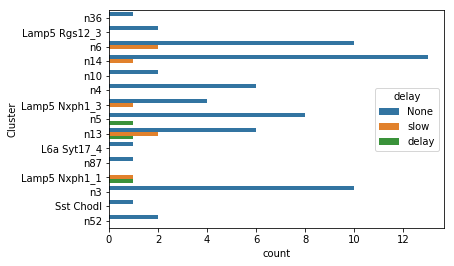

In [26]:
sns.countplot(y = 'Cluster', hue = 'delay', data = df)


In [28]:
sorted(df.Cluster.unique())

[u'L6a Syt17_4',
 u'Lamp5 Nxph1_1',
 u'Lamp5 Nxph1_3',
 u'Lamp5 Rgs12_3',
 u'Sst Chodl',
 u'n10',
 u'n13',
 u'n14',
 u'n3',
 u'n36',
 u'n4',
 u'n5',
 u'n52',
 u'n6',
 u'n87']

In [ ]:
clusters = [
    'n3', 'n4', 'n5', 'n6', 'n10', 'Lamp5 Rgs12_3',
    'n13', 'Lamp5 Nxph1_1', 'Lamp5 Nxph1_3',

            
            
[u'L6a Syt17_4',

 u'Sst Chodl',
 u'n14',
 u'n36',
 u'n52',
 u'n87']

In [20]:
len(df)

77